In [1]:
import pandas as pd
import numpy as np

### Use the generated feature file as the input for the model construction

In [2]:
df = pd.read_csv('generate_sliding.csv')
df.head(3)

,user_id,phone,search_1,search_7,search_14,play_1,play_7,play_14,down_1,down_7,down_14,churn
0,168276196,ar,0,0,0,0,8,159,0,0,0,1
1,169017759,ar,1,6,37,228,322,563,0,1,221,0
2,168494395,ar,4,4,5,7,7,56,0,0,0,0


In [3]:
df_feature = df.drop('user_id', axis = 1)
df_feature.head(3)

,phone,search_1,search_7,search_14,play_1,play_7,play_14,down_1,down_7,down_14,churn
0,ar,0,0,0,0,8,159,0,0,0,1
1,ar,1,6,37,228,322,563,0,1,221,0
2,ar,4,4,5,7,7,56,0,0,0,0


In [4]:
df_phone = pd.get_dummies(df_feature['phone'])
del df_feature['phone']
df_feature.head(3)

,search_1,search_7,search_14,play_1,play_7,play_14,down_1,down_7,down_14,churn
0,0,0,0,0,8,159,0,0,0,1
1,1,6,37,228,322,563,0,1,221,0
2,4,4,5,7,7,56,0,0,0,0


In [5]:
df_matrix = df_feature.join(df_phone)
df_matrix.head(3)

,search_1,search_7,search_14,play_1,play_7,play_14,down_1,down_7,down_14,churn,ar,ip,mc,wp
0,0,0,0,0,8,159,0,0,0,1,1,0,0,0
1,1,6,37,228,322,563,0,1,221,0,1,0,0,0
2,4,4,5,7,7,56,0,0,0,0,1,0,0,0


In [6]:
df_matrix['play_ratio_7_1'] = df_matrix['play_7']/(df_matrix['play_1'] + 1)
df_matrix['play_ratio_14_7'] = df_matrix['play_14']/(df_matrix['play_7'] + 1)
df_matrix['play_ratio_14_1'] = df_matrix['play_14']/(df_matrix['play_1'] + 1)

df_matrix['down_ratio_7_1'] = df_matrix['down_7']/(df_matrix['down_1'] + 1)
df_matrix['down_ratio_14_7'] = df_matrix['down_14']/(df_matrix['down_7'] + 1)
df_matrix['down_ratio_14_1'] = df_matrix['down_14']/(df_matrix['down_1'] + 1)

df_matrix['search_ratio_7_1'] = df_matrix['search_7']/(df_matrix['search_1'] + 1)
df_matrix['search_ratio_14_7'] = df_matrix['search_14']/(df_matrix['search_7'] + 1)
df_matrix['search_ratio_14_1'] = df_matrix['search_14']/(df_matrix['search_1'] + 1)

df_matrix['play_down_ratio_1'] = df_matrix['play_1']/(df_matrix['down_1'] + 1)
df_matrix['play_down_ratio_7'] = df_matrix['play_7']/(df_matrix['down_7'] + 1)
df_matrix['play_down_ratio_14'] = df_matrix['play_14']/(df_matrix['down_14'] + 1)

df_matrix['play_search_ratio_1'] = df_matrix['play_1']/(df_matrix['search_1'] + 1)
df_matrix['play_search_ratio_7'] = df_matrix['play_7']/(df_matrix['search_7'] + 1)
df_matrix['play_search_ratio_14'] = df_matrix['play_14']/(df_matrix['search_14'] + 1)

df_matrix['search_down_ratio_1'] = df_matrix['search_1']/(df_matrix['down_1'] + 1)
df_matrix['search_down_ratio_7'] = df_matrix['search_7']/(df_matrix['down_7'] + 1)
df_matrix['search_down_ratio_14'] = df_matrix['search_14']/(df_matrix['down_14'] + 1)

df_matrix.head(5)

,search_1,search_7,search_14,play_1,play_7,play_14,down_1,down_7,down_14,churn,...,search_ratio_14_1,play_down_ratio_1,play_down_ratio_7,play_down_ratio_14,play_search_ratio_1,play_search_ratio_7,play_search_ratio_14,search_down_ratio_1,search_down_ratio_7,search_down_ratio_14
0,0,0,0,0,8,159,0,0,0,1,...,0.0,0.0,8.000000,159.000000,0.0,8.0,159.000000,0.0,0.000000,0.000000
1,1,6,37,228,322,563,0,1,221,0,...,18.5,228.0,161.000000,2.536036,114.0,46.0,14.815789,1.0,3.000000,0.166667
2,4,4,5,7,7,56,0,0,0,0,...,1.0,7.0,7.000000,56.000000,1.4,1.4,9.333333,4.0,4.000000,5.000000
3,0,1,15,70,130,305,0,0,3,0,...,15.0,70.0,130.000000,76.250000,70.0,65.0,19.062500,0.0,1.000000,3.750000
4,1,4,4,2,50,180,0,2,2,0,...,2.0,2.0,16.666667,60.000000,1.0,10.0,36.000000,1.0,1.333333,1.333333


In [7]:
y = np.array(df_matrix['churn'])
del df_matrix['churn']
x = np.array(df_matrix)

In [8]:
print('shape of x is:%s' % str(x.shape))
print('shape of y is:%s' % str(y.shape))

shape of x is:(363200, 31)
shape of y is:(363200,)


In [9]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [11]:
feature_names = df_matrix.columns.values
feature_names.shape

(31,)

### Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn import cross_validation

LogisticModel = LogisticRegression(n_jobs = -1)
LogisticModel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print('Training DataSet Score: %f' % LogisticModel.score(x_train, y_train))
print('Testing DataSet Score: %f' % LogisticModel.score(x_test, y_test))

Training DataSet Score: 0.713717
Testing DataSet Score: 0.714290


Using GridSearch method to find the best model parameters with lowest mean cross validation score

In [14]:
LR_param = {
    "C": [0.5,1,2,4,8,16],
    "tol": [0.001,0.0001,0.00001]
}
LR = LogisticRegression(n_jobs = 4)
LR_grid = GridSearchCV(LR, LR_param, cv=5)
LR_grid.fit(x_train, y_train)
print("Logistic Regression: Best parameters set found on development set:")  
print(LR_grid.best_params_)

Logistic Regression: Best parameters set found on development set:
{'C': 2, 'tol': 0.001}


In [15]:
LogisticModel = LogisticRegression(C = 2, tol = 0.001)
LogisticModel.fit(x_train, y_train)
print('Training DataSet Score: %f' % LogisticModel.score(x_train, y_train))
print('Testing DataSet Score: %f' % LogisticModel.score(x_test, y_test))

Training DataSet Score: 0.715050
Testing DataSet Score: 0.715699


In [16]:
def get_top_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

The top 5 features to determine the churn activities are:

In [17]:
coeff = np.absolute(LogisticModel.coef_[0])
get_top_values(coeff, 5, feature_names)

['ar', 'ip', 'search_down_ratio_1', 'search_ratio_7_1', 'search_1']

### Random Forest Classifier

In [18]:
RandomForestModel = RandomForestClassifier(n_jobs=-1)
RandomForestModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
print("Training DataSet Score: %f" % (RandomForestModel.score(x_train, y_train)))
print("Testing DataSet Score: %f" % (RandomForestModel.score(x_test, y_test)))

Training DataSet Score: 0.889273
Testing DataSet Score: 0.742401


In [21]:
RF_param = {
    "n_estimators": [60,70,80,90],
    "criterion": ["entropy","gini"],
    "min_samples_split": [80,100,120,140,160],
}
RF = RandomForestClassifier(n_jobs=-1, random_state = 1)
RF_grid = GridSearchCV(RF, RF_param, cv=5)
RF_grid.fit(x_train, y_train)
print("Random Forest: Best parameters set found on development set:")  
print(RF_grid.best_params_)

Random Forest: Best parameters set found on development set:
{'min_samples_split': 160, 'n_estimators': 90, 'criterion': 'entropy'}


In [22]:
RandomForestModel = RandomForestClassifier(min_samples_split=160, n_estimators=90, criterion='entropy', n_jobs=-1)
RandomForestModel.fit(x_train, y_train)
print("Training DataSet Score: %f" % (RandomForestModel.score(x_train, y_train)))
print("Testing DataSet Score: %f" % (RandomForestModel.score(x_test, y_test)))

Training DataSet Score: 0.778122
Testing DataSet Score: 0.754758


The top 5 features to determine the churn activities are:

In [23]:
get_top_values(RandomForestModel.feature_importances_, 5, feature_names)

['play_down_ratio_1',
 'play_search_ratio_1',
 'play_1',
 'play_ratio_7_1',
 'play_7']

### Gradient Boosting Decision Tree

In [24]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
def modelfit(alg, x_train, y_train, names, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(x_train, y_train)
        
    #Predict training set:
    y_predictions = alg.predict(x_train)
    y_predprob = alg.predict_proba(x_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_train, y_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, names).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.7511
AUC Score (Train): 0.830436
CV Score : Mean - 0.8286804 | Std - 0.002417049 | Min - 0.825548 | Max - 0.8318539


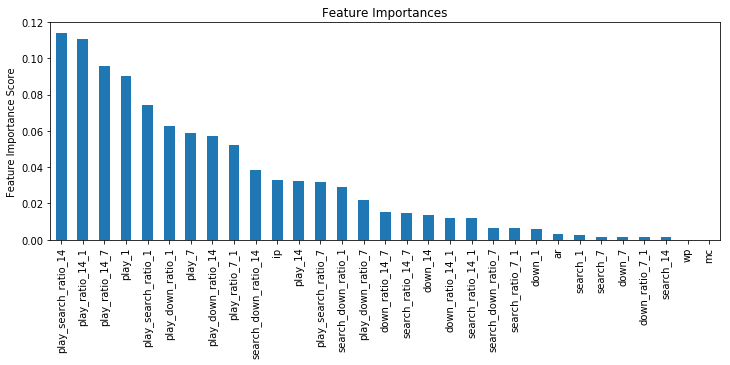

In [25]:
gbm = GradientBoostingClassifier(random_state=1)
modelfit(gbm, x_train, y_train, feature_names)

In [26]:
print("Training DataSet Score: %f" % (gbm.score(x_train, y_train)))
print("Testing DataSet Score: %f" % (gbm.score(x_test, y_test)))

Training DataSet Score: 0.751129
Testing DataSet Score: 0.750066


In [27]:
param_test1 = {'n_estimators':range(300, 1000 ,100)}
gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
    param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [300, 400, 500, 600, 700, 800, 900]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [28]:
print(gsearch1.grid_scores_)
print('Best Parameter: %s' % gsearch1.best_params_)
print('Best Score: %f' % gsearch1.best_score_)

[mean: 0.83179, std: 0.00269, params: {'n_estimators': 300}, mean: 0.83146, std: 0.00269, params: {'n_estimators': 400}, mean: 0.83092, std: 0.00262, params: {'n_estimators': 500}, mean: 0.83049, std: 0.00267, params: {'n_estimators': 600}, mean: 0.83004, std: 0.00260, params: {'n_estimators': 700}, mean: 0.82959, std: 0.00264, params: {'n_estimators': 800}, mean: 0.82914, std: 0.00268, params: {'n_estimators': 900}]
Best Parameter: {'n_estimators': 300}
Best Score: 0.831787


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [29]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [200, 400, 600, 800, 1000], 'max_depth': [5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
print(gsearch2.grid_scores_)
print('Best Parameter: %s' % gsearch2.best_params_)
print('Best Score: %f' % gsearch2.best_score_)

[mean: 0.83134, std: 0.00271, params: {'min_samples_split': 200, 'max_depth': 5}, mean: 0.83145, std: 0.00266, params: {'min_samples_split': 400, 'max_depth': 5}, mean: 0.83144, std: 0.00262, params: {'min_samples_split': 600, 'max_depth': 5}, mean: 0.83151, std: 0.00269, params: {'min_samples_split': 800, 'max_depth': 5}, mean: 0.83136, std: 0.00268, params: {'min_samples_split': 1000, 'max_depth': 5}, mean: 0.83165, std: 0.00249, params: {'min_samples_split': 200, 'max_depth': 7}, mean: 0.83198, std: 0.00268, params: {'min_samples_split': 400, 'max_depth': 7}, mean: 0.83180, std: 0.00266, params: {'min_samples_split': 600, 'max_depth': 7}, mean: 0.83190, std: 0.00280, params: {'min_samples_split': 800, 'max_depth': 7}, mean: 0.83193, std: 0.00265, params: {'min_samples_split': 1000, 'max_depth': 7}, mean: 0.83099, std: 0.00277, params: {'min_samples_split': 200, 'max_depth': 9}, mean: 0.83147, std: 0.00275, params: {'min_samples_split': 400, 'max_depth': 9}, mean: 0.83134, std: 0.002

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [31]:
param_test3 = {'min_samples_leaf':range(100,151,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300,max_depth=7,min_samples_split=400,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=400, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': [100, 110, 120, 130, 140, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [32]:
print(gsearch3.grid_scores_)
print('Best Parameter: %s' % gsearch3.best_params_)
print('Best Score: %f' % gsearch3.best_score_)

[mean: 0.83180, std: 0.00284, params: {'min_samples_leaf': 100}, mean: 0.83186, std: 0.00272, params: {'min_samples_leaf': 110}, mean: 0.83200, std: 0.00261, params: {'min_samples_leaf': 120}, mean: 0.83175, std: 0.00277, params: {'min_samples_leaf': 130}, mean: 0.83175, std: 0.00268, params: {'min_samples_leaf': 140}, mean: 0.83167, std: 0.00264, params: {'min_samples_leaf': 150}]
Best Parameter: {'min_samples_leaf': 120}
Best Score: 0.831999


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [33]:
param_test4 = {'subsample':[0.85,0.9, 0.95,1]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300,max_depth=7, min_samples_split=400, min_samples_leaf=120, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=120,
              min_samples_split=400, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.85, 0.9, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [34]:
print(gsearch4.grid_scores_)
print('Best Parameter: %s' % gsearch4.best_params_)
print('Best Score: %f' % gsearch4.best_score_)

[mean: 0.83169, std: 0.00273, params: {'subsample': 0.85}, mean: 0.83187, std: 0.00246, params: {'subsample': 0.9}, mean: 0.83195, std: 0.00272, params: {'subsample': 0.95}, mean: 0.83192, std: 0.00269, params: {'subsample': 1}]
Best Parameter: {'subsample': 0.95}
Best Score: 0.831953


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [35]:
param_test5 = {'learning_rate':[0.1,0.05,0.01,0.005,0.001]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=300,max_depth=7, min_samples_split=400, min_samples_leaf=120, subsample=0.95,random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=120,
              min_samples_split=400, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=10,
              subsample=0.95, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [36]:
print(gsearch5.grid_scores_)
print('Best Parameter: %s' % gsearch5.best_params_)
print('Best Score: %f' % gsearch5.best_score_)

[mean: 0.83195, std: 0.00272, params: {'learning_rate': 0.1}, mean: 0.83240, std: 0.00263, params: {'learning_rate': 0.05}, mean: 0.83180, std: 0.00254, params: {'learning_rate': 0.01}, mean: 0.83099, std: 0.00252, params: {'learning_rate': 0.005}, mean: 0.82958, std: 0.00256, params: {'learning_rate': 0.001}]
Best Parameter: {'learning_rate': 0.05}
Best Score: 0.832400


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



Model Report
Accuracy : 0.7644
AUC Score (Train): 0.843597
CV Score : Mean - 0.8324037 | Std - 0.002639127 | Min - 0.8290152 | Max - 0.8358305


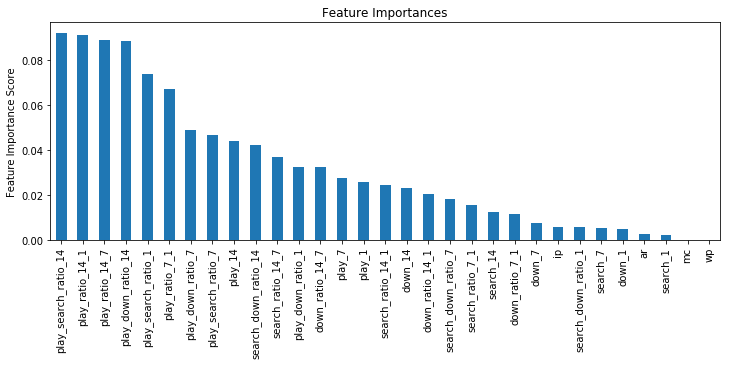

In [39]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, n_estimators=300,max_depth=7, min_samples_split=400, min_samples_leaf=130, subsample=0.95,random_state=10)
modelfit(gbm, x_train, y_train, feature_names)

In [40]:
print("Training DataSet Score: %f" % (gbm.score(x_train, y_train)))
print("Testing DataSet Score: %f" % (gbm.score(x_test, y_test)))

Training DataSet Score: 0.764383
Testing DataSet Score: 0.752974
